In [40]:
%%html
<!--
<style>
.CodeMirror { width: 100vw; }
.prompt  { visibility: hidden; width: 0px !important; }
.prompt_container { visibility: hidden; width: 0px !important; }
.container {  width: 95% !important; }
.rendered_html { font-size:0.8em; }
.rendered_html table, .rendered_html th, .rendered_html tr, .rendered_html td { font-size: 100%;}
td { font-size: 16px }
</style>
-->

# CS 121 Lecture 6 : Code and data

In [1]:
# utility code 
%run "Utilities.ipynb"
from IPython.display import clear_output
clear_output()

In [2]:
def AND(a,b): return a*b

def OR(a,b): return 1 if a+b else 0

def NOT(a): return 1-a

In [3]:
def IF(cond,a,b):
    notcond = NAND(cond,cond)
    temp = NAND(b,notcond)
    temp1 = NAND(a,cond)
    return NAND(temp,temp1)
mystery = circuit2prog(circuit(IF))

In [8]:
# What function does the following NAND-CIRC program compute?
print(mystery)

gate_0 = NAND(X[0],X[0])
gate_1 = NAND(X[2],gate_0)
gate_2 = NAND(X[1],X[0])
Y[0] = NAND(gate_1,gate_2)



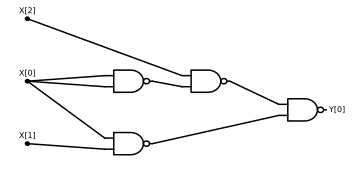

In [7]:
circuit(mystery)

## Sugar all the way 

In [ ]:
def NOT(a): return NAND(a,a)
def AND(a,b): return NOT(NAND(a,b))
def OR(a,b): return NAND(NOT(a),NOT(b))

In [ ]:
GLOBAL_NANDONLY = True

In [ ]:
def MAJ(a,b,c):
    u = NAND(a,b)
    v = NAND(a,c)
    w = NAND(b,c)
    z = NAND(u,v)
    return NAND(w,NOT(z))

In [ ]:
def XOR(a,b):
    u = NAND(a,b)
    v = NAND(a,u)
    w = NAND(b,u)
    return NAND(v,w)

def XOR3(a,b,c):
    return XOR(XOR(a,b),c)

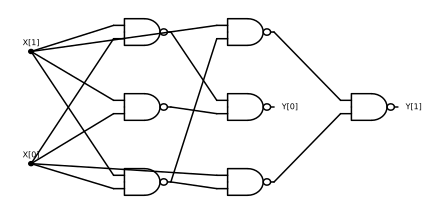

In [58]:
def ADD1(a,b):
    return AND(a,b),XOR(a,b)

circuit(ADD1)

In [59]:
def addnumbers(X,Y):
    n = len(X)
    Z = [0]*(n+1)
    carry = zero(X[0])
    for i in range(n-1,-1,-1):
        Z[i+1] = XOR3(X[i],Y[i],carry)
        carry = MAJ(carry,X[i],Y[i])
    Z[0] = carry
    return Z

addnumbers([1,1],[1,1])

[1, 1, 0]

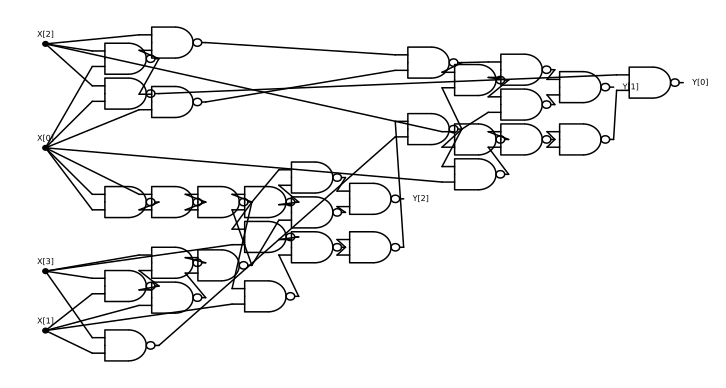

In [60]:
add2circ = circuit(addnumbers,2,2)
add2circ

In [ ]:
table(add2circ)

In [ ]:
add2circ.size()

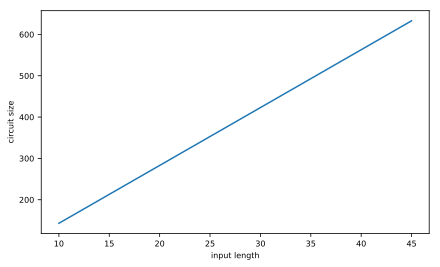

In [61]:
X = list(range(10,50,5))
Y = [circuit(addnumbers,n,n).size() for n in X]
import matplotlib.pyplot as plt
plt.plot(X,Y)
plt.ylabel('circuit size')
plt.xlabel('input length')
plt.show()